In [1]:
import pandas as pd
import html5lib
import datetime
import re

hundred_time_table=   pd.read_html('https://ja.wikipedia.org/wiki/100%E3%83%A1%E3%83%BC%E3%83%88%E3%83%AB%E7%AB%B6%E8%B5%B0') 
df_hundread = hundred_time_table[6]

In [2]:
df_hundread.head(3)

,0,1,2,3,4,5,6
0,年,記録,風速,名前,所属,場所,日付
1,1964,100610秒06,+1.1,ボブ・ヘイズ,アメリカ合衆国,東京,1964年10月15日
2,1968,100310秒03,+0.9,ジム・ハインズ,アメリカ合衆国,サクラメント,1968年6月20日


In [3]:
#この処理無駄。カラム名を変えながら、１行目を削除している。
df_hundread.columns = df_hundread.iloc[0]
df_hundread = df_hundread.drop(0)
df_hundread.head(3)

,年,記録,風速,名前,所属,場所,日付
1,1964,100610秒06,+1.1,ボブ・ヘイズ,アメリカ合衆国,東京,1964年10月15日
2,1968,100310秒03,+0.9,ジム・ハインズ,アメリカ合衆国,サクラメント,1968年6月20日
3,1968,1002A10秒02A,+2.0,チャールズ・エドワード・グリーン,アメリカ合衆国,メキシコシティ,1968年10月13日


In [4]:
#記録カラムが数値になってないので正規表現で変換
for i, z in zip(df_hundread['記録'], range(len(df_hundread['記録']))):
    m = re.search('(10|9)秒(\d\d)', i)
    df_hundread.iloc[[z], [1]]= float(m.group(1) + '.' + m.group(2))

In [5]:
df_hundread.head(3)

,年,記録,風速,名前,所属,場所,日付
1,1964,10.06,+1.1,ボブ・ヘイズ,アメリカ合衆国,東京,1964年10月15日
2,1968,10.03,+0.9,ジム・ハインズ,アメリカ合衆国,サクラメント,1968年6月20日
3,1968,10.02,+2.0,チャールズ・エドワード・グリーン,アメリカ合衆国,メキシコシティ,1968年10月13日


In [6]:
type(df_hundread['記録'][1])

float

In [7]:
#日付カラムをdatetime型へ変換
for day, p in zip(df_hundread['日付'], range(len(df_hundread['日付']))):
    df_hundread.iloc[[p], [6]] = datetime.datetime.strptime(day, '%Y年%m月%d日')

In [8]:
df_hundread.head(3)

,年,記録,風速,名前,所属,場所,日付
1,1964,10.06,+1.1,ボブ・ヘイズ,アメリカ合衆国,東京,1964-10-15 00:00:00
2,1968,10.03,+0.9,ジム・ハインズ,アメリカ合衆国,サクラメント,1968-06-20 00:00:00
3,1968,10.02,+2.0,チャールズ・エドワード・グリーン,アメリカ合衆国,メキシコシティ,1968-10-13 00:00:00


(9.2, 10.5)

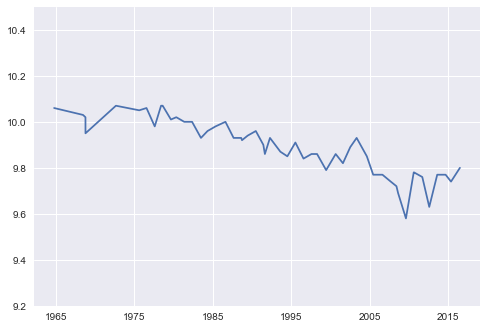

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(df_hundread['日付'], df_hundread['記録'])
plt.ylim([9.2,10.5])

In [10]:
df_hundread[df_hundread['記録']  == df_hundread['記録'].min()]

,年,記録,風速,名前,所属,場所,日付
46,2009,9.58,+0.9,ウサイン・ボルト,ジャマイカ,ベルリン,2009-08-16 00:00:00


## 100m優勝シーンをYouTubeで見る

In [11]:
import requests, json
from IPython.display import YouTubeVideo

In [12]:
print('シーズン記録と世界記録の変遷')
df_hundread

シーズン記録と世界記録の変遷


,年,記録,風速,名前,所属,場所,日付
1,1964,10.06,+1.1,ボブ・ヘイズ,アメリカ合衆国,東京,1964-10-15 00:00:00
2,1968,10.03,+0.9,ジム・ハインズ,アメリカ合衆国,サクラメント,1968-06-20 00:00:00
3,1968,10.02,+2.0,チャールズ・エドワード・グリーン,アメリカ合衆国,メキシコシティ,1968-10-13 00:00:00
4,1968,9.95,+0.3,ジム・ハインズ,アメリカ合衆国,メキシコシティ,1968-10-14 00:00:00
5,1972,10.07,0.0,ワレリー・ボルゾフ,ソビエト連邦,ミュンヘン,1972-08-31 00:00:00
6,1975,10.05,-1.2,スティーブ・リディック（英語版）,アメリカ合衆国,チューリッヒ,1975-08-20 00:00:00
7,1976,10.06,-0.1,ヘイズリー・クロフォード,トリニダード・トバゴ,モントリオール,1976-07-24 00:00:00
8,1977,9.98,+0.6,シルビオ・レオナルド,キューバ,グアダラハラ,1977-08-11 00:00:00
9,1978,10.07,+1.7,クランシー・エドワーズ（英語版）,アメリカ合衆国,ユージーン,1978-06-02 00:00:00
10,1978,10.07,+1.8,エドワード・ハート（英語版）,アメリカ合衆国,コロラドスプリングス,1978-07-30 00:00:00


In [13]:
#run_indexにインデックスを入れる。例えば「46」の場合は、「ウサインボルトの9.58」動画でます。
run_index = 53

In [14]:
query = df_hundread['年'][run_index] + ' ' + df_hundread['名前'][run_index]
key = 'YOUR API KEY'

youtube_url = 'https://www.googleapis.com/youtube/v3/search?part=snippet&maxResults=1&q={}&key={}'.format(query,key)

res = requests.get(youtube_url)
json_text = json.loads(res.text)

In [15]:
vid = json_text['items'][0]['id']['videoId']
title = json_text['items'][0]['snippet']['title']

2015世界陸上北京男子100m決勝ボルトvsガトリン


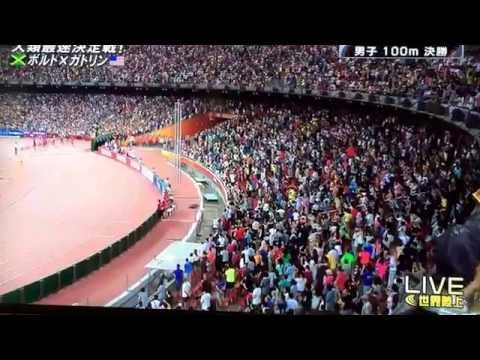

In [16]:
print(title)
YouTubeVideo(vid)